# Regresión lineal multivariante

In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [7]:
df= pd.read_csv('price_mul.csv',sep=';')
df #tenemos el precio en función del numero de habitaciones
#y de los años que tiene la casa

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [8]:
df.bedrooms=df.bedrooms.fillna(df.bedrooms.median())
df #rellenamos el NaN con la mediana para poder realizarlo

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [9]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [10]:
reg.coef_, reg.intercept_ 

(array([  112.06244194, 23388.88007794, -3231.71790863]), 221323.0018654043)

La ecuación lineal multivariante estimada es:

$y =221323.0018654043 + 112.06244194 \times area + 23388.88007794 \times bedrooms -3231.71790863 \times year$

Si queremos predecir el precio de una casa de 2500 pies cuadrados con 4 habitaciones y 5 años obtendríamos

In [11]:
reg.predict([[2500,4,5]])

array([578876.03748933])

#### ¿Se cumplen los supuestos del modelo?
- Linealidad: Que la relación entre las variables sea lineal.
- Independencia: Que los errores en la medición de las variables explicativas sean
 independientes entre sí.
- Homocedasticidad: Que los errores tengan varianza constante.
- Normalidad: Que las variables sigan la Ley Normal.
- No colinealidad: Que las variables independientes no estén correlacionadas entre ellas (caso multivariante)

In [13]:
df.corr()['price']

area        0.901476
bedrooms    0.919803
age        -0.734167
price       1.000000
Name: price, dtype: float64

Vemos como esto tiene sentido, ya que a mas area y mas habitaciones mas costará la casa, pero a mas años de vida de la casa, esta costará menos.

Text(0, 0.5, 'price')

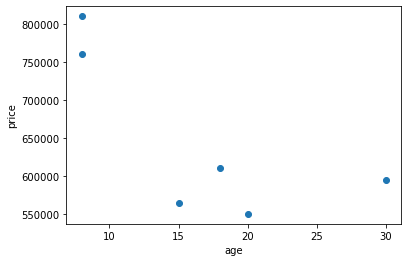

In [26]:
plt.scatter(df.age,df.price)
plt.xlabel('age')
plt.ylabel('price')

Text(0, 0.5, 'price')

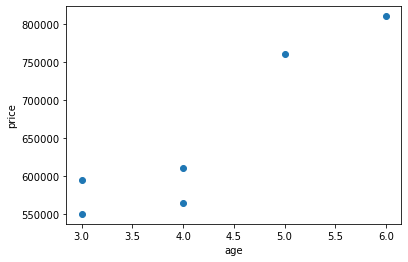

In [27]:
plt.scatter(df.bedrooms,df.price)
plt.xlabel('bedrooms')
plt.ylabel('price')

Text(0, 0.5, 'price')

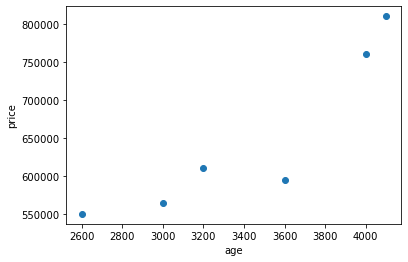

In [28]:
plt.scatter(df.area,df.price)
plt.xlabel('area')
plt.ylabel('price')

Hay cierta relación lineal en cuanto a las variables explicativas y la variable explicada

In [30]:
reg.score(df.drop('price',axis='columns'),df.price)

0.9550196399325819

El R cuadrado indica un muy buen ajuste por medio de las 3 variables que explican el precio de las viviendas. Además podemos considerar las 3 variables normales, ya que el numero de habitaciones, la edad de los pisos asi como el area que abarca la vivienda se distribuyen de forma normal

In [37]:
import statsmodels.api as sm
from sklearn import preprocessing



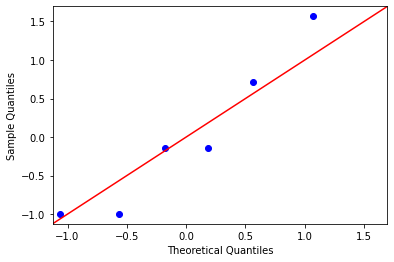

In [43]:
normalized_bed = (df.bedrooms-df.bedrooms.mean())/df.bedrooms.std()
fig = sm.qqplot(normalized_bed, line='45')
plt.show()

La variable bedrooms es normal

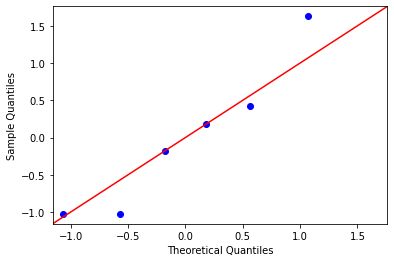

In [44]:
normalized_age = (df.age-df.age.mean())/df.age.std()
fig = sm.qqplot(normalized_age, line='45')
plt.show()

La variable age también es normal

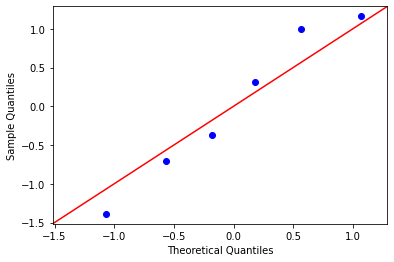

In [45]:
normalized_area = (df.area-df.area.mean())/df.area.std()
fig = sm.qqplot(normalized_area, line='45')
plt.show()

La variable area es normal

In [47]:
residuos = df.price - reg.predict(df.drop('price',axis='columns'))
residuos

0    31782.367024
1   -37590.079374
2    -5307.414037
3    -2962.895832
4     -663.426755
5    14741.448973
Name: price, dtype: float64

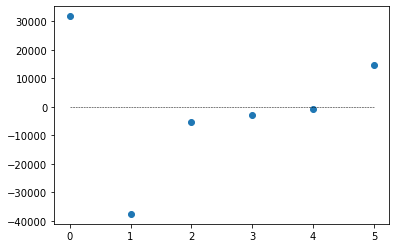

In [50]:
plt.scatter(np.arange(0,6),residuos)
plt.plot(np.arange(0,6),np.repeat(0,6),color='black',linewidth=0.5,linestyle='--')

Los residuos parecen homocedásticos (misma varianza), e independientes (no hay patrones de ningun tipo). Con lo que el modelo es válido